In [1]:
import gdown
url='https://www.dropbox.com/s/efitgt363ada95a/opencv_bootcamp_assets_12.zip?dl=1'
output='data.zip'
gdown.download(url,output,quiet=True)
gdown.extractall(output)

['deploy.prototxt', 'res10_300x300_ssd_iter_140000_fp16.caffemodel']

In [5]:
import cv2
import matplotlib.pyplot as plt

In [3]:
model=cv2.dnn.readNetFromCaffe('/content/deploy.prototxt','/content/res10_300x300_ssd_iter_140000_fp16.caffemodel')
in_width=300
in_height=300
mean=[104,117,123]
con_threshold=0.7

In [14]:
def face_detection(img):
  frame=cv2.imread(img)
  frame_width=frame.shape[1]
  frame_height=frame.shape[0]
  blob=cv2.dnn.blobFromImage(frame,1.0,(in_width,in_height),mean,swapRB=False,crop=False)
  model.setInput(blob)
  detections=model.forward()
  for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > con_threshold:
            x_top_left = int(detections[0, 0, i, 3] * frame_width)
            y_top_left = int(detections[0, 0, i, 4] * frame_height)
            x_bottom_right  = int(detections[0, 0, i, 5] * frame_width)
            y_bottom_right  = int(detections[0, 0, i, 6] * frame_height)

            cv2.rectangle(frame, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (0, 255, 0))
            label = "Confidence: %.4f" % confidence
            label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            cv2.rectangle(
                frame,
                (x_top_left, y_top_left - label_size[1]),
                (x_top_left + label_size[0], y_top_left + base_line),
                (255, 255, 255),
                cv2.FILLED,
            )
            cv2.putText(frame, label, (x_top_left, y_top_left), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
  frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  plt.imshow(frame)


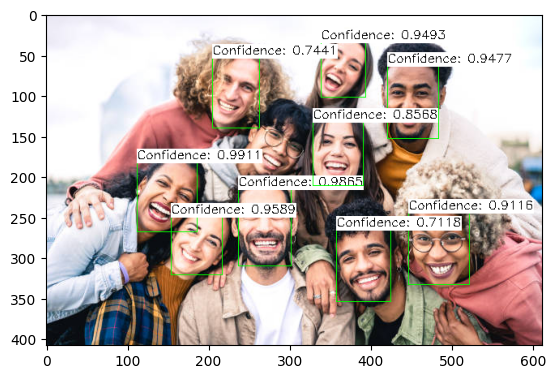

In [16]:
face_detection("/content/p.jpg")
